In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('export_potential.csv')
colnames = list(df.columns[1:-1])

,Country,export_potential,actual_export
0,United States,575000000.0,424000000.0
1,German,478000000.0,367000000.0
2,Japan,273000000.0,216000000.0
3,Korea,171000000.0,126000000.0
4,China,170000000.0,89000000.0


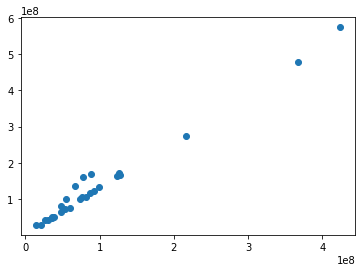

In [3]:
plt.scatter(df['actual_export'],df['export_potential'])

In [4]:
df.isna().sum()

 Country            1
export_potential    1
actual_export       1
dtype: int64

In [5]:
df = df.drop([27])

In [29]:
scaler = MinMaxScaler()

scaler.fit(df[['actual_export']])
df['actual_export_normal'] = scaler.transform(df[['actual_export']])

scaler.fit(df[['export_potential']])
df['export_potential_normal'] = scaler.transform(df[['export_potential']])

In [30]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['actual_export_normal','export_potential_normal']])
y_predicted

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [32]:
df['cluster'] = y_predicted 

,Country,export_potential,actual_export,actual_export_normal,export_potential_normal,cluster
0,United States,575000000.0,424000000.0,1.000000,1.000000,1
1,German,478000000.0,367000000.0,0.860976,0.822669,1
2,Japan,273000000.0,216000000.0,0.492683,0.447898,0
3,Korea,171000000.0,126000000.0,0.273171,0.261426,0
4,China,170000000.0,89000000.0,0.182927,0.259598,0
5,Honkong,165000000.0,128000000.0,0.278049,0.250457,0
6,France,164000000.0,123000000.0,0.265854,0.248629,0
7,India,161000000.0,78000000.0,0.156098,0.243144,0
8,Vietnam,135000000.0,67000000.0,0.129268,0.195612,0
9,Taipei,134000000.0,99000000.0,0.207317,0.193784,0


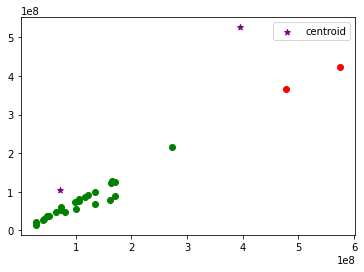

In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.export_potential,df1['actual_export'],color='green')
plt.scatter(df2.export_potential,df2['actual_export'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [24]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['export_potential','actual_export']])
    sse.append(km.inertia_)


C:\Users\bookr\.conda\envs\book\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


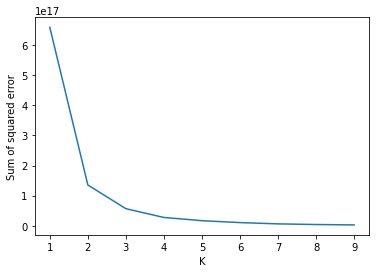

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [33]:
df.dtypes

 Country                    object
export_potential           float64
actual_export              float64
actual_export_normal       float64
export_potential_normal    float64
cluster                      int32
dtype: object

In [34]:
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_samples, silhouette_score

In [35]:
df_shorts = df[['export_potential_normal','actual_export_normal']]
df_shorts.head()

,export_potential_normal,actual_export_normal
0,1.000000,1.000000
1,0.822669,0.860976
2,0.447898,0.492683
3,0.261426,0.273171
4,0.259598,0.182927


In [36]:
SK = range(2,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_shorts).labels_
    score = metrics.silhouette_score(df_shorts,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_shorts,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.8305211586500912
Silhouette score for k(clusters) = 3 is 0.5252266772389492
Silhouette score for k(clusters) = 4 is 0.5618999176506563
Silhouette score for k(clusters) = 5 is 0.48888263527597386
Silhouette score for k(clusters) = 6 is 0.4418219839286518
Silhouette score for k(clusters) = 7 is 0.4465942825397814
Silhouette score for k(clusters) = 8 is 0.49670998154699103
Silhouette score for k(clusters) = 9 is 0.48573790552106993
Silhouette score for k(clusters) = 10 is 0.43965540185739754
Silhouette score for k(clusters) = 11 is 0.4524008560556112
Silhouette score for k(clusters) = 12 is 0.4685142669642733


In [37]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['actual_export','export_potential']])
y_predicted

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

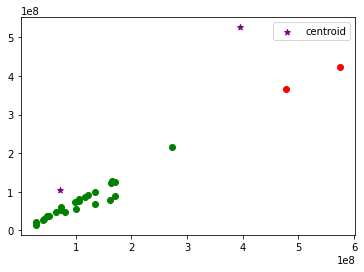

In [38]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.export_potential,df1['actual_export'],color='green')
plt.scatter(df2.export_potential,df2['actual_export'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [39]:
score = silhouette_score(df_shorts, km.labels_, metric='euclidean')
print('Silhouetter Score: %.14f' % score)

Silhouetter Score: 0.83052115865009


In [44]:
df = df.drop(columns = ['actual_export_normal','export_potential_normal'])

In [45]:
df

,Country,export_potential,actual_export,cluster
0,United States,575000000.0,424000000.0,1
1,German,478000000.0,367000000.0,1
2,Japan,273000000.0,216000000.0,0
3,Korea,171000000.0,126000000.0,0
4,China,170000000.0,89000000.0,0
5,Honkong,165000000.0,128000000.0,0
6,France,164000000.0,123000000.0,0
7,India,161000000.0,78000000.0,0
8,Vietnam,135000000.0,67000000.0,0
9,Taipei,134000000.0,99000000.0,0


In [50]:
for i in range(2,27):
    df = df.drop([i]) 

In [51]:
df

,Country,export_potential,actual_export,cluster
0,United States,575000000.0,424000000.0,1
1,German,478000000.0,367000000.0,1
